In [15]:
import os
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
import os 

path = os.listdir("Data")
path2 = os.path.join("Data", "df_main.csv")

In [17]:
# โหลดข้อมูล
df = pd.read_csv(path2)

In [18]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,img_id,sentences,text_length,word_list,Negative,Neutral,Positive,has_cta,ctr,ctr_group
0,0.708480,0.759826,0.449038,0.476864,0.791149,0.541827,0.389004,0.282455,0.802612,0.318787,...,c7e254ff6e829bbd379c791c06dba26a,วันนี - 14 มีนาคม 2568 รีบด่วน 400 web hosting,46,"['วัน', 'นี', ' ', '-', ' ', '14', ' ', 'มีนาค...",0,16,0,False,0.000000,Low
1,0.733801,0.642118,0.425671,0.490838,0.708187,0.605140,0.204538,0.374215,0.633562,0.262923,...,310f05853aa67594eadcecfaeab260c9,แฟลชเซล มาก่อน ได้ก่อน 899 12 00 น.,35,"['แฟลช', 'เซ', 'ล', ' ', 'มา', 'ก่อน', ' ', 'ไ...",0,1,0,False,0.016482,Low
2,0.587095,0.655419,0.328038,0.582514,0.626008,0.675075,0.503859,0.556132,0.578276,0.380239,...,a602b8402e30353896de582cfc8602d6,ifex prc ติวเข้ม tfex ให้ takeprofit ได้แบบมือโปร,49,"['ifex', ' ', 'prc', ' ', 'ติว', 'เข้ม', ' ', ...",0,6,0,False,0.000000,Low
3,0.353129,0.343184,0.522671,0.418777,0.223161,0.525447,0.458935,0.600709,0.323766,0.623137,...,4eea40723af32721712529331dc268e8,สร้างรายได้เสริมจากที่บ้าน ด้วยการสอน ai เขียน...,59,"['สร้าง', 'รายได้', 'เสริม', 'จาก', 'ที่', 'บ้...",0,37,0,True,0.000000,Low
4,0.570452,0.067015,0.308653,0.352218,0.347666,0.537102,0.193613,0.497158,0.483621,0.717515,...,c863dc028d2446a5a578c77a2efa5806,uniol0 management candidate 2025 25 บีนาคม 256...,73,"['uniol', '0', ' ', 'management', ' ', 'candid...",0,17,0,True,0.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0.501477,0.709318,0.594054,0.468367,0.402899,0.624929,0.440527,0.272052,0.834530,0.241055,...,e5a836a0356dc3b5949c00eb9ddb2c08,empty_record,0,"['empty', '_record']",0,0,0,False,0.072270,High
1111,0.339184,0.468420,0.391167,0.396819,0.314405,0.466089,0.555852,0.497243,0.397880,0.577542,...,62d04bf55fa25c0b1e4976346030997c,spring sale,11,"['spring', ' ', 'sale']",0,70,0,False,0.053965,High
1112,0.573479,0.587674,0.394277,0.786340,0.636821,0.249928,0.536042,0.363466,0.418655,0.417026,...,f000a0f5e71a56d81262fe8bab8b2b5a,cstu,4,['cstu'],0,0,0,False,0.063264,High
1113,0.662974,0.529609,0.232303,0.705959,0.504155,0.368674,0.386872,0.190539,0.321462,0.451873,...,ca7337f25230b8c60291929edd36682e,คณะสกิติประยุกต์นิดา รับสมัคธนักศึกษา ระดับปริ...,85,"['คณะ', 'สกิ', 'ติ', 'ประยุกต์', 'นิ', 'ดา', '...",0,35,0,False,0.000000,Low


In [19]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,img_id,sentences,text_length,word_list,Negative,Neutral,Positive,has_cta,ctr,ctr_group
0,0.708480,0.759826,0.449038,0.476864,0.791149,0.541827,0.389004,0.282455,0.802612,0.318787,...,c7e254ff6e829bbd379c791c06dba26a,วันนี - 14 มีนาคม 2568 รีบด่วน 400 web hosting,46,"['วัน', 'นี', ' ', '-', ' ', '14', ' ', 'มีนาค...",0,16,0,False,0.000000,Low
1,0.733801,0.642118,0.425671,0.490838,0.708187,0.605140,0.204538,0.374215,0.633562,0.262923,...,310f05853aa67594eadcecfaeab260c9,แฟลชเซล มาก่อน ได้ก่อน 899 12 00 น.,35,"['แฟลช', 'เซ', 'ล', ' ', 'มา', 'ก่อน', ' ', 'ไ...",0,1,0,False,0.016482,Low
2,0.587095,0.655419,0.328038,0.582514,0.626008,0.675075,0.503859,0.556132,0.578276,0.380239,...,a602b8402e30353896de582cfc8602d6,ifex prc ติวเข้ม tfex ให้ takeprofit ได้แบบมือโปร,49,"['ifex', ' ', 'prc', ' ', 'ติว', 'เข้ม', ' ', ...",0,6,0,False,0.000000,Low
3,0.353129,0.343184,0.522671,0.418777,0.223161,0.525447,0.458935,0.600709,0.323766,0.623137,...,4eea40723af32721712529331dc268e8,สร้างรายได้เสริมจากที่บ้าน ด้วยการสอน ai เขียน...,59,"['สร้าง', 'รายได้', 'เสริม', 'จาก', 'ที่', 'บ้...",0,37,0,True,0.000000,Low
4,0.570452,0.067015,0.308653,0.352218,0.347666,0.537102,0.193613,0.497158,0.483621,0.717515,...,c863dc028d2446a5a578c77a2efa5806,uniol0 management candidate 2025 25 บีนาคม 256...,73,"['uniol', '0', ' ', 'management', ' ', 'candid...",0,17,0,True,0.000000,Low


In [20]:
# เช็ค missing แล้ว fillna ถ้ามี fillna คือการเติมหรือแทน missing value
df = df.fillna("")

In [21]:
# แปลง has_cta ให้เป็น int
df['has_cta'] = df['has_cta'].astype(int)

In [22]:
# แปลง label เป็น category
df['ctr_group'] = df['ctr_group'].astype('category')

In [23]:
# เพิ่มฟีเจอร์ keyword โปรโมชัน
promo_keywords = ['ฟรี', 'ลด', 'โปร', 'ส่งฟรี', 'ราคาพิเศษ', 'ดีล', 'คูปอง', 'flash', 'deal']
df['has_promo_keyword'] = df['sentences'].apply(lambda x: any(word in x.lower() for word in promo_keywords)).astype(int)

In [24]:
# เตรียมฟีเจอร์และ label
feature_cols = [f'feature_{i}' for i in range(128)] + [
    'text_length', 'Negative', 'Neutral', 'Positive', 'has_cta', 'has_promo_keyword'
]
X = df[feature_cols]
y = df['ctr_group']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.9226190476190477
              precision    recall  f1-score   support

        High       0.96      0.88      0.92        84
         Low       0.89      0.96      0.93        84

    accuracy                           0.92       168
   macro avg       0.93      0.92      0.92       168
weighted avg       0.93      0.92      0.92       168



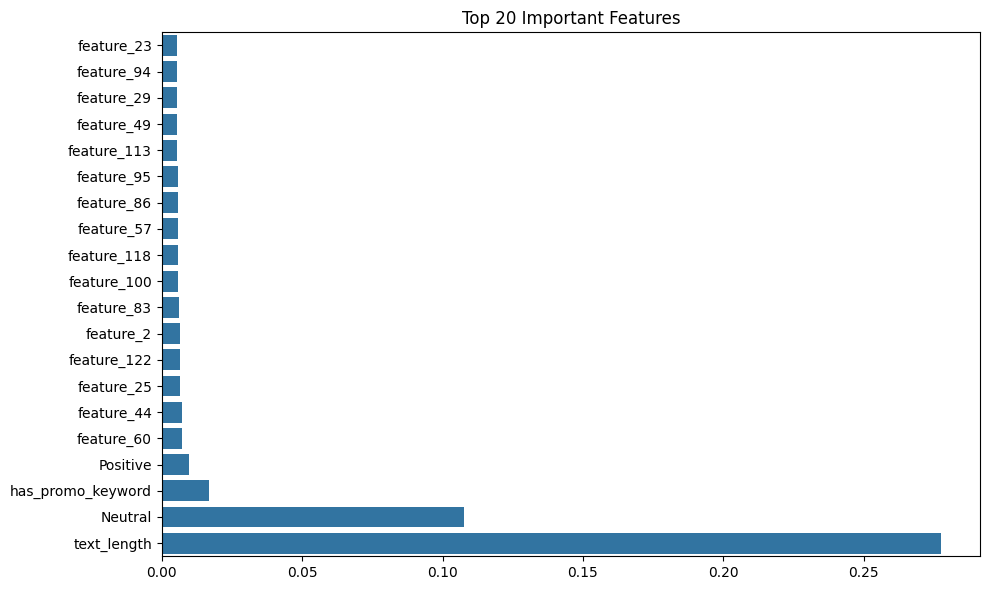

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[feature_cols[i] for i in indices])
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()


In [27]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [28]:
label_encoder = LabelEncoder()
df['ctr_group'] = label_encoder.fit_transform(df['ctr_group'])  # Low=0, High=1

In [29]:
image_features = [f"feature_{i}" for i in range(128)]  # use first 128 for now
extra_features = ['text_length', 'Negative', 'Neutral', 'Positive', 'has_cta']
all_features = image_features + extra_features

X = df[all_features]
y = df['ctr_group']

In [30]:
X['has_cta'] = X['has_cta'].astype(int)

C:\Users\BM MONEY\AppData\Local\Temp\ipykernel_19616\3070253564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['has_cta'] = X['has_cta'].astype(int)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9345238095238095
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        84
           1       0.91      0.96      0.94        84

    accuracy                           0.93       168
   macro avg       0.94      0.93      0.93       168
weighted avg       0.94      0.93      0.93       168



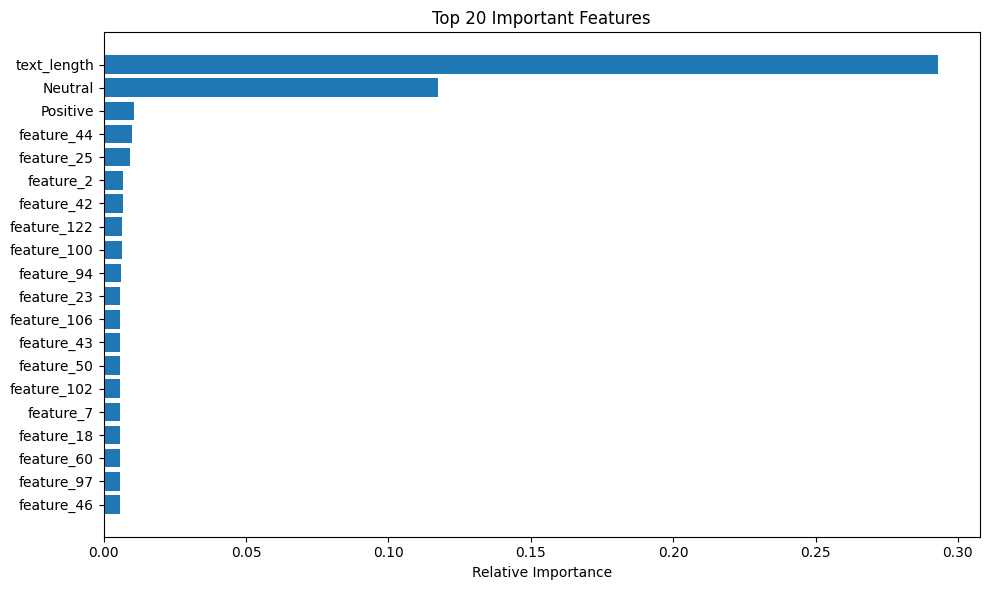

In [35]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 6))
plt.title("Top 20 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [36]:
# 1. เตรียม X, y
X = df.drop(['ctr_group', 'ctr', 'img_id', 'sentences', 'word_list'], axis=1)
y = df['ctr_group']

In [37]:
# 2. แปลง label เป็นตัวเลข
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'Low' -> 0, 'High' -> 1

In [38]:
# 3. ใช้ SMOTE Smote เป็นวิธีสร้าง ข้อมูลปลอม (synthetic samples) ขึ้นมาใน class ที่มีน้อย เพื่อให้ class ต่าง ๆ มีจำนวนสมดุลกันมากขึ้น
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: ctr_group
1    558
0    557
Name: count, dtype: int64
After SMOTE: 1    558
0    558
Name: count, dtype: int64


In [39]:
# 4. แบ่ง train/test ใหม่
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42
)

In [40]:
# 5. Train model ใหม่
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# 6. Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.91      0.88      0.90        83

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.90      0.90      0.90       168



In [42]:
feature_names = X.columns.tolist()

In [43]:
top_indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in top_indices]

X_top = X[top_features]

In [44]:
# เอา top 20 feature ที่สำคัญที่สุด
top_indices = np.argsort(importances)[::-1][:20]
top_features = [feature_names[i] for i in top_indices]

# เลือกเฉพาะ column เหล่านี้
X_top = X[top_features]

In [45]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_top, y)  # ใช้ X_top แทน X เดิม
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

cluster_id: 0.2931
Negative: 0.1174
Neutral: 0.0107
feature_44: 0.0100
feature_25: 0.0093
feature_2: 0.0067
feature_42: 0.0067
feature_122: 0.0066
feature_100: 0.0063
feature_94: 0.0063
feature_23: 0.0058
feature_106: 0.0058
feature_43: 0.0058
feature_50: 0.0058
feature_102: 0.0057
feature_7: 0.0057
feature_18: 0.0057
feature_60: 0.0056
feature_97: 0.0056
feature_46: 0.0056


In [47]:
image_folder = r"images"       # ถ้าอยู่ใน images/
# หรือ
image_folder = r"./ads"        # ถ้าอยู่ใน ads/ (relative path)

In [48]:
import os
print(os.listdir())

['.git', 'Data', 'EDA and Processing', 'Feature Engineering', 'Model Result', 'Model Training', 'Pre-Model VAE', 'Processing Photo Ads', 'requirements.txt', 'SHAP', 'wtf (2).ipynb']


In [49]:
import glob

# หาทุกไฟล์ภาพ .jpg หรือ .png จากทุกโฟลเดอร์ย่อย
image_paths = glob.glob("**/*.jpg", recursive=True) + glob.glob("**/*.png", recursive=True)

print(f"พบรูปภาพจำนวน {len(image_paths)} ไฟล์")
print("ตัวอย่างไฟล์ภาพ:", image_paths[:5])


พบรูปภาพจำนวน 0 ไฟล์
ตัวอย่างไฟล์ภาพ: []
